In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'cv2'

In [2]:
%pip install opencv-python

   ---------------------------------------- 0.0/40.2 MB ? eta -:--:--
   - -------------------------------------- 1.8/40.2 MB 11.8 MB/s eta 0:00:04
   --- ------------------------------------ 3.7/40.2 MB 10.2 MB/s eta 0:00:04
   ----- ---------------------------------- 5.5/40.2 MB 9.4 MB/s eta 0:00:04
   ------- -------------------------------- 7.1/40.2 MB 9.1 MB/s eta 0:00:04
   -------- ------------------------------- 8.4/40.2 MB 8.5 MB/s eta 0:00:04
   ---------- ----------------------------- 10.2/40.2 MB 8.7 MB/s eta 0:00:04
   ----------- ---------------------------- 11.8/40.2 MB 8.6 MB/s eta 0:00:04
   ------------- -------------------------- 13.6/40.2 MB 8.5 MB/s eta 0:00:04
   --------------- ------------------------ 15.2/40.2 MB 8.5 MB/s eta 0:00:03
   ---------------- ----------------------- 17.0/40.2 MB 8.4 MB/s eta 0:00:03
   ------------------ --------------------- 18.6/40.2 MB 8.4 MB/s eta 0:00:03
   -------------------- ------------------- 20.2/40.2 MB 8.4 MB/s eta 0:00:

In [3]:
import urllib.request

img_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/2/24/Wilhelma_Zoo_-_giraffe.jpg/640px-Wilhelma_Zoo_-_giraffe.jpg"
img_path = "sample.jpg"

urllib.request.urlretrieve(img_url, img_path)

img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(7,5))
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

HTTPError: HTTP Error 403: Forbidden

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

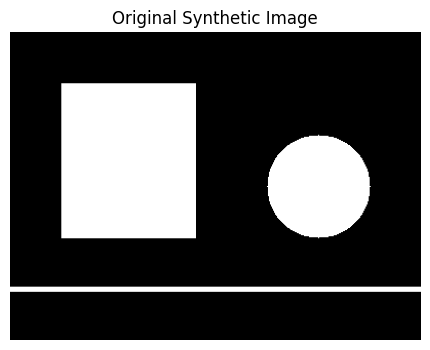

In [5]:
# Create a black canvas
img_bgr = np.zeros((300, 400, 3), dtype=np.uint8)

# Draw shapes (white rectangle, circle, line)
cv2.rectangle(img_bgr, (50, 50), (180, 200), (255, 255, 255), -1)
cv2.circle(img_bgr, (300, 150), 50, (255, 255, 255), -1)
cv2.line(img_bgr, (0, 250), (400, 250), (255, 255, 255), 3)

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,4))
plt.imshow(img_rgb)
plt.title("Original Synthetic Image")
plt.axis("off")
plt.show()

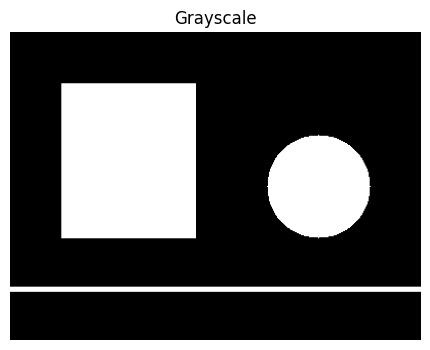

In [6]:
gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5,5), 0)

plt.figure(figsize=(6,4))
plt.imshow(gray, cmap="gray")
plt.title("Grayscale")
plt.axis("off")
plt.show()

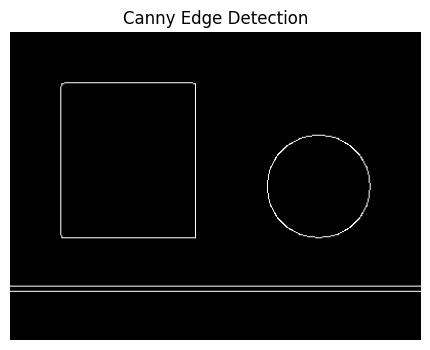

In [7]:
edges = cv2.Canny(blur, 100, 200)

plt.figure(figsize=(6,4))
plt.imshow(edges, cmap="gray")
plt.title("Canny Edge Detection")
plt.axis("off")
plt.show()

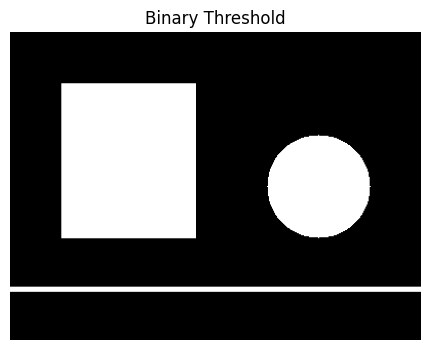

In [8]:
_, thresh_bin = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(6,4))
plt.imshow(thresh_bin, cmap="gray")
plt.title("Binary Threshold")
plt.axis("off")
plt.show()

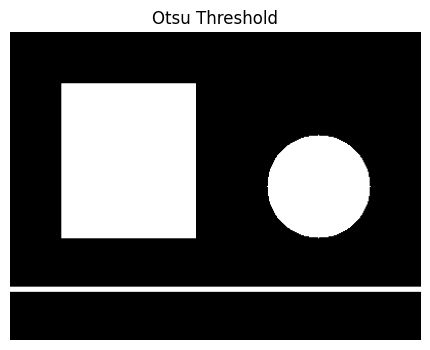

In [9]:
_, thresh_otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(6,4))
plt.imshow(thresh_otsu, cmap="gray")
plt.title("Otsu Threshold")
plt.axis("off")
plt.show()

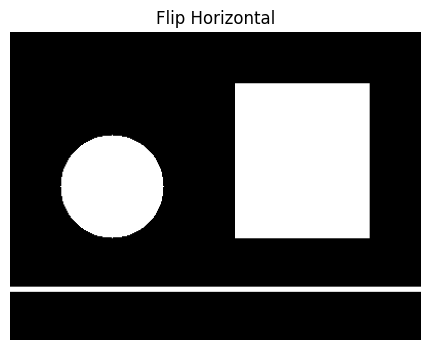

In [10]:
flip_h = cv2.flip(img_bgr, 1)
flip_h_rgb = cv2.cvtColor(flip_h, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,4))
plt.imshow(flip_h_rgb)
plt.title("Flip Horizontal")
plt.axis("off")
plt.show()

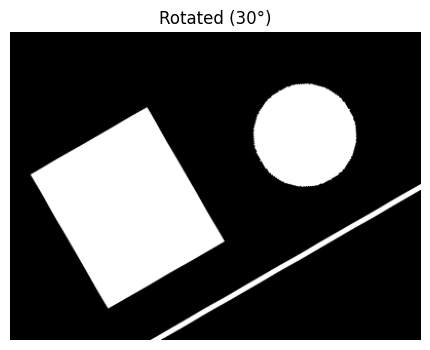

In [11]:
h, w = img_bgr.shape[:2]
center = (w // 2, h // 2)

M = cv2.getRotationMatrix2D(center, 30, 1.0)
rotated = cv2.warpAffine(img_bgr, M, (w, h))
rotated_rgb = cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,4))
plt.imshow(rotated_rgb)
plt.title("Rotated (30°)")
plt.axis("off")
plt.show()

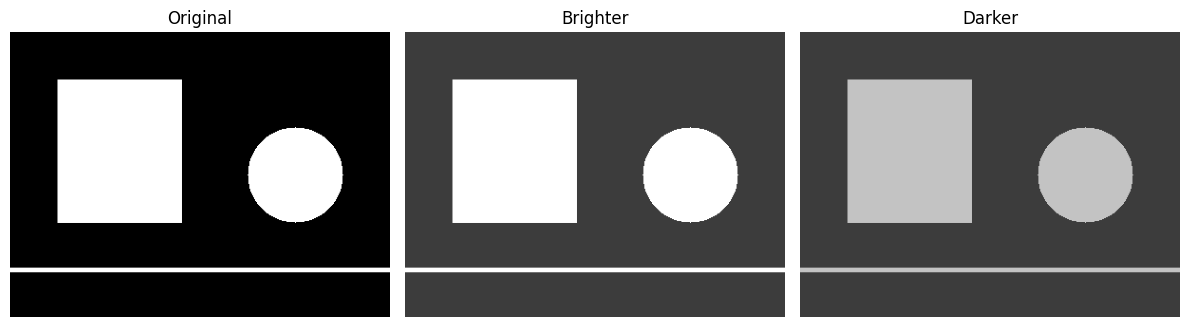

In [12]:
def adjust_brightness(bgr_img, beta=60):
    return cv2.convertScaleAbs(bgr_img, alpha=1.0, beta=beta)

brighter = adjust_brightness(img_bgr, beta=60)
darker   = adjust_brightness(img_bgr, beta=-60)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(brighter, cv2.COLOR_BGR2RGB))
plt.title("Brighter")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(darker, cv2.COLOR_BGR2RGB))
plt.title("Darker")
plt.axis("off")

plt.tight_layout()
plt.show()